In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
!pip install sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.7 MB/s 


In [ ]:
dataset = pd.read_csv('/content/nutrition.csv')

In [ ]:
dataset.head()

Unnamed: 0             name serving_size  calories total_fat saturated_fat  \
0           0       Cornstarch        100 g       381      0.1g           NaN   
1           1     Nuts, pecans        100 g       691       72g          6.2g   
2           2    Eggplant, raw        100 g        25      0.2g           NaN   
3           3   Teff, uncooked        100 g       367      2.4g          0.4g   
4           4  Sherbet, orange        100 g       144        2g          1.2g   

  cholesterol    sodium  choline     folate  ...      fat  \
0           0   9.00 mg   0.4 mg   0.00 mcg  ...   0.05 g   
1           0   0.00 mg  40.5 mg  22.00 mcg  ...  71.97 g   
2           0   2.00 mg   6.9 mg  22.00 mcg  ...   0.18 g   
3           0  12.00 mg  13.1 mg          0  ...   2.38 g   
4         1mg  46.00 mg   7.7 mg   4.00 mcg  ...   2.00 g   

  saturated_fatty_acids monounsaturated_fatty_acids  \
0               0.009 g                     0.016 g   
1               6.180 g                    40.801 g   
2               0.034 g                     0.016 g   
3               0.449 g                     0.589 g   
4               1.160 g                     0.530 g   

  polyunsaturated_fatty_acids fatty_acids_total_trans alcohol     ash  \
0                     0.025 g                 0.00 mg   0.0 g  0.09 g   
1                    21.614 g                 0.00 mg   0.0 g  1.49 g   
2                     0.076 g                 0.00 mg   0.0 g  0.66 g   
3                     1.071 g                       0       0  2.37 g   
4                     0.080 g                 1.00 mg   0.0 g  0.40 g   

  caffeine theobromine    water  
0  0.00 mg     0.00 mg   8.32 g  
1  0.00 mg     0.00 mg   3.52 g  
2  0.00 mg     0.00 mg  92.30 g  
3        0           0   8.82 g  
4  0.00 mg     0.00 mg  66.10 g  

[5 rows x 77 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6230 entries, 0 to 6229
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   6230 non-null   int64 
 1   name                         6230 non-null   object
 2   serving_size                 6230 non-null   object
 3   calories                     6230 non-null   int64 
 4   total_fat                    6230 non-null   object
 5   saturated_fat                4853 non-null   object
 6   cholesterol                  6230 non-null   object
 7   sodium                       6230 non-null   object
 8   choline                      6230 non-null   object
 9   folate                       6230 non-null   object
 10  folic_acid                   6230 non-null   object
 11  niacin                       6230 non-null   object
 12  pantothenic_acid             6230 non-null   object
 13  riboflavin                   6230

In [ ]:
dataset.describe

<bound method NDFrame.describe of       Unnamed: 0                                               name  \
0              0                                         Cornstarch   
1              1                                       Nuts, pecans   
2              2                                      Eggplant, raw   
3              3                                     Teff, uncooked   
4              4                                    Sherbet, orange   
...          ...                                                ...   
6225        6225  Beverages, prepared with whole milk, powder, n...   
6226        6226  Lamb, raw, separable lean only, boneless, chum...   
6227        6227  Fast Foods, skin and breading removed, meat on...   
6228        6228  Candies, MILKY WAY Caramels. dark chocolate co...   
6229        6229  Rolls, commercially prepared (includes brown-a...   

     serving_size  calories total_fat saturated_fat cholesterol     sodium  \
0           100 g       381      0.

In [ ]:
dataset.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    3114.500000
calories       231.002568
lucopene         0.000000
dtype: float64

In [ ]:
dataset.isnull().sum()

Unnamed: 0      0
name            0
serving_size    0
calories        0
total_fat       0
               ..
alcohol         1
ash             1
caffeine        1
theobromine     1
water           1
Length: 77, dtype: int64

In [ ]:
dataset.count

<bound method DataFrame.count of       Unnamed: 0                                               name  \
0              0                                         Cornstarch   
1              1                                       Nuts, pecans   
2              2                                      Eggplant, raw   
3              3                                     Teff, uncooked   
4              4                                    Sherbet, orange   
...          ...                                                ...   
6225        6225  Beverages, prepared with whole milk, powder, n...   
6226        6226  Lamb, raw, separable lean only, boneless, chum...   
6227        6227  Fast Foods, skin and breading removed, meat on...   
6228        6228  Candies, MILKY WAY Caramels. dark chocolate co...   
6229        6229  Rolls, commercially prepared (includes brown-a...   

     serving_size  calories total_fat saturated_fat cholesterol     sodium  \
0           100 g       381      0.1

In [ ]:
report = sv.analyze(dataset)

                                             |          | [  0%]   00:00 -> (? left)


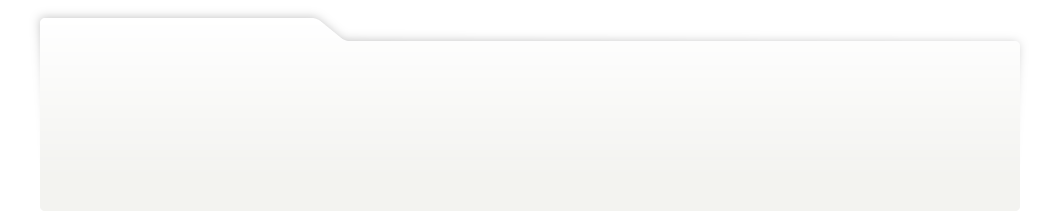
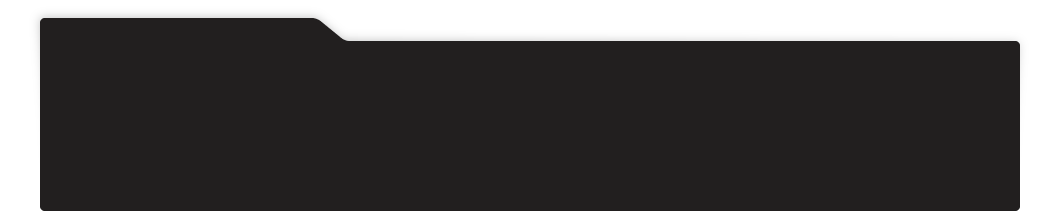
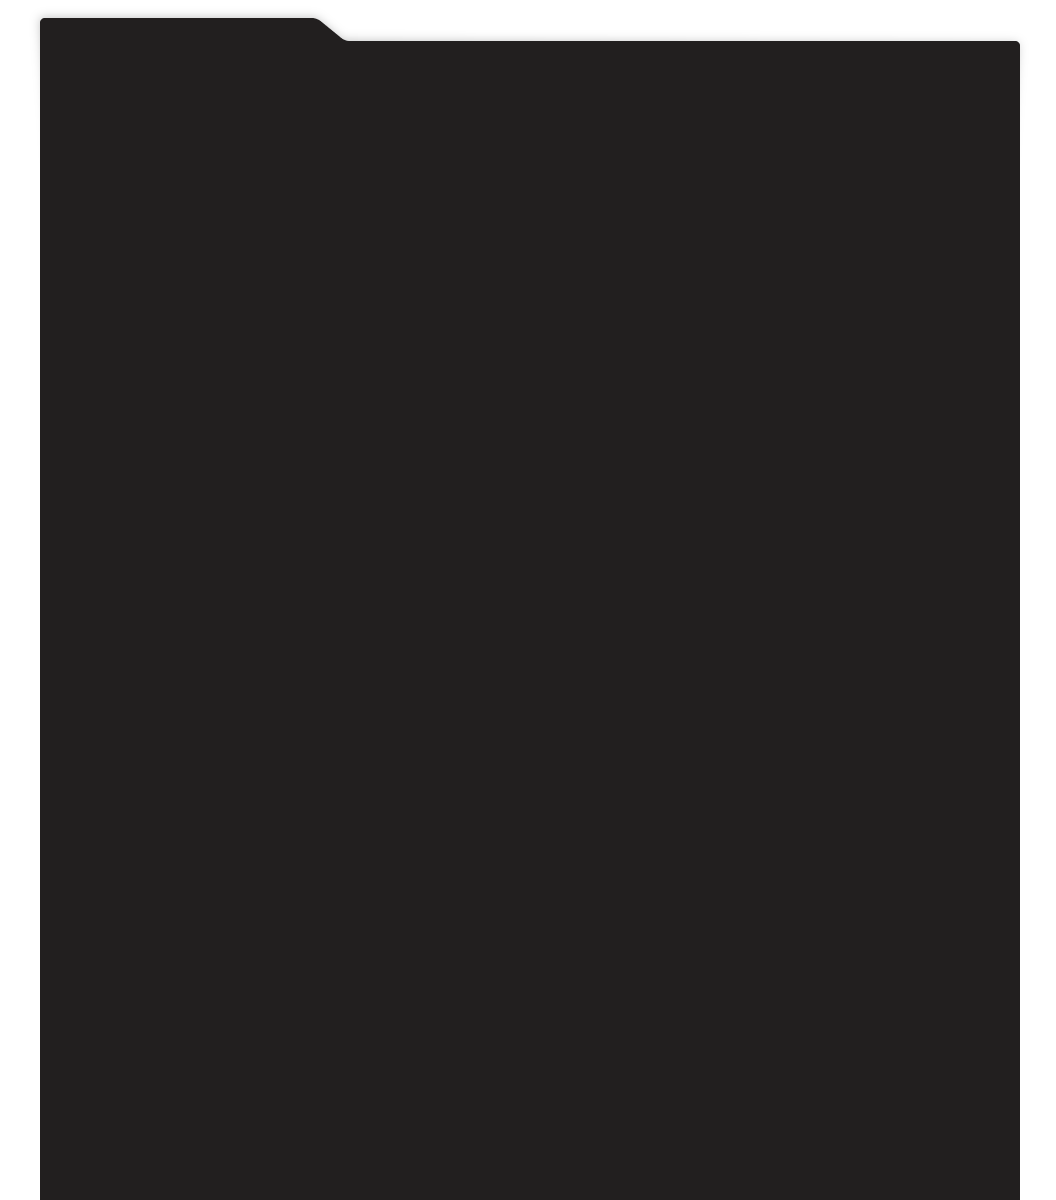
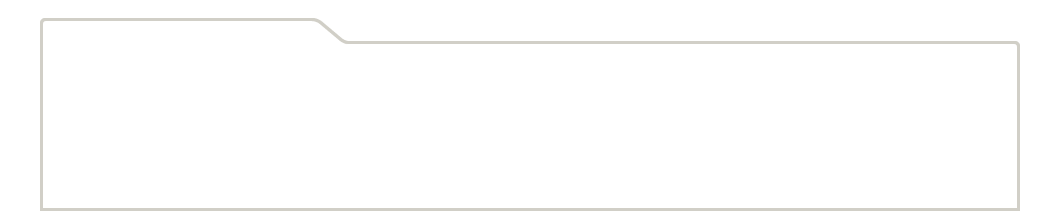
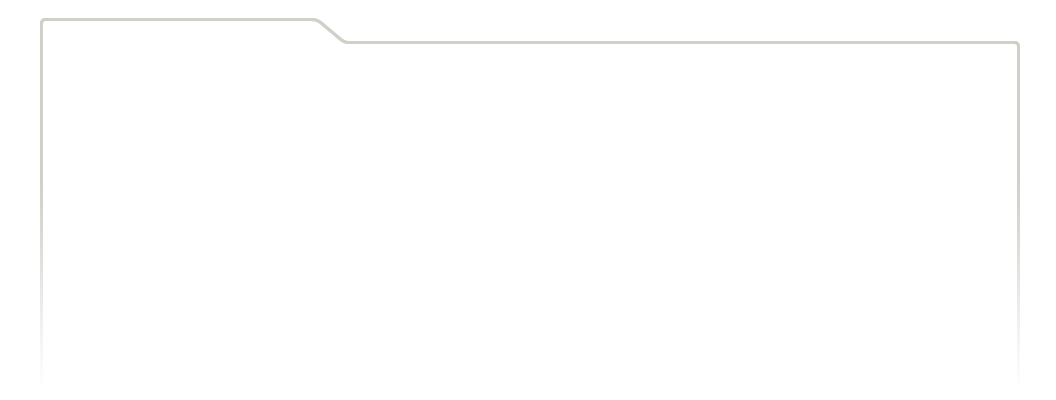
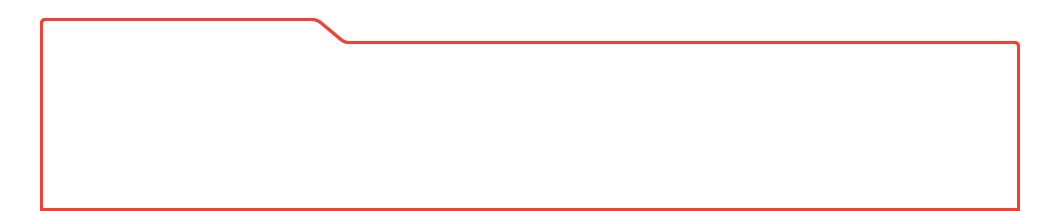
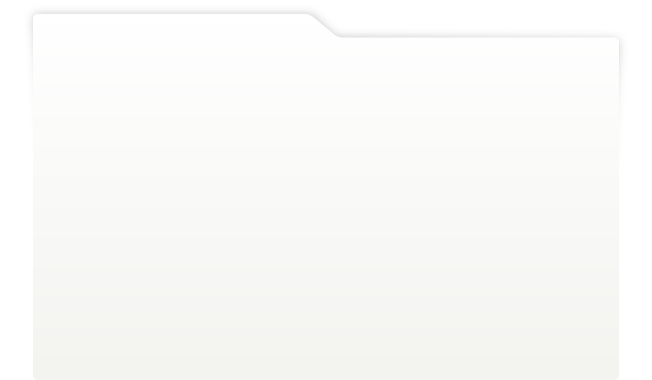
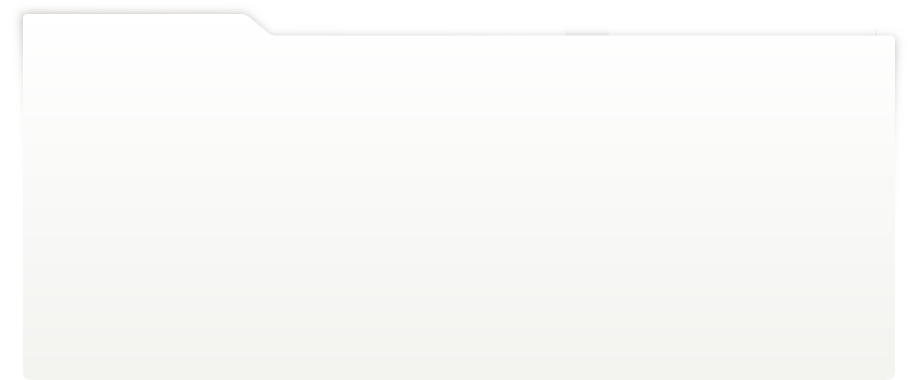
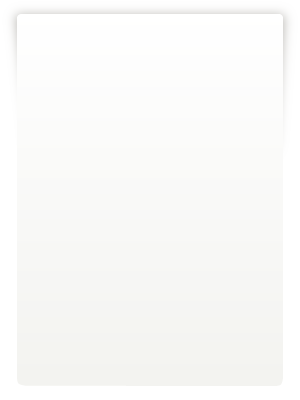
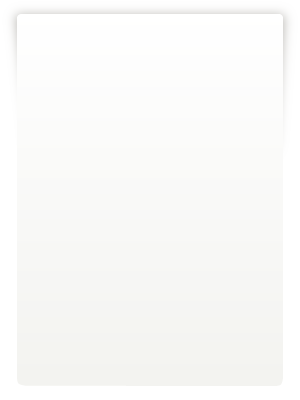
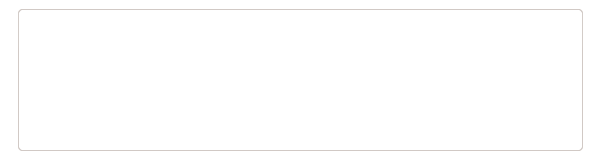
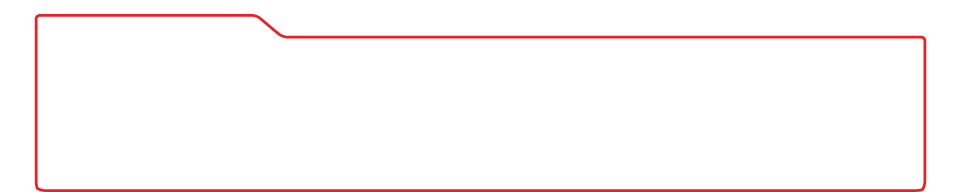
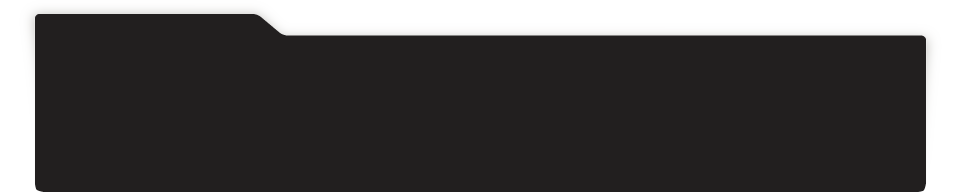
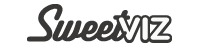
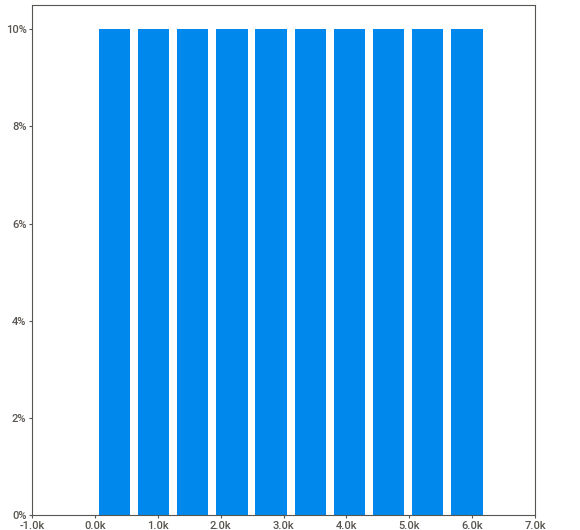
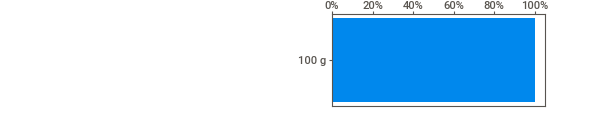
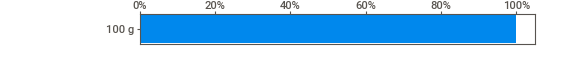
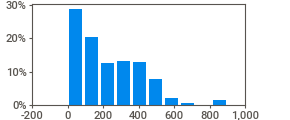
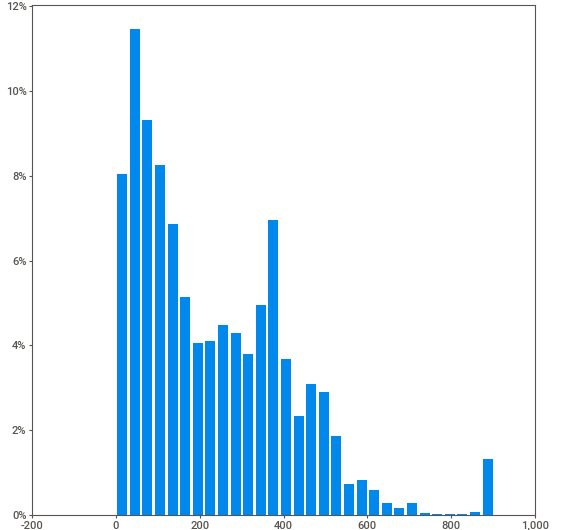
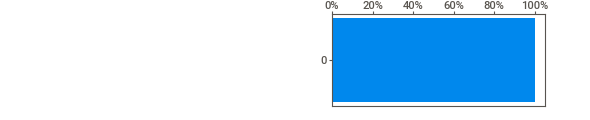
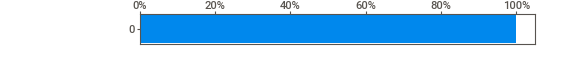
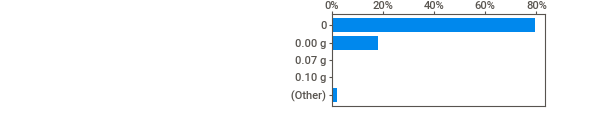
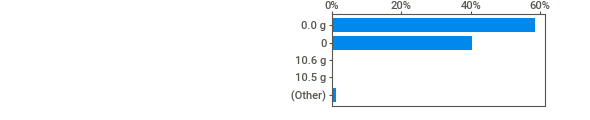
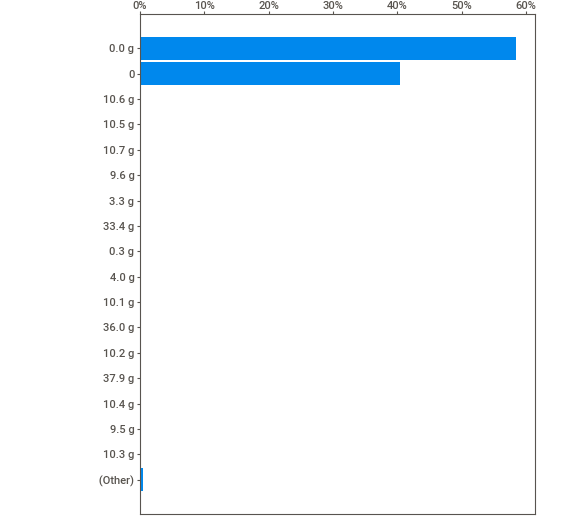
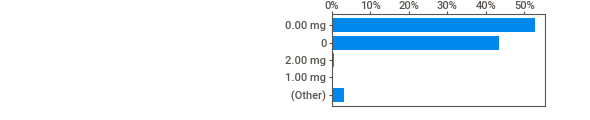
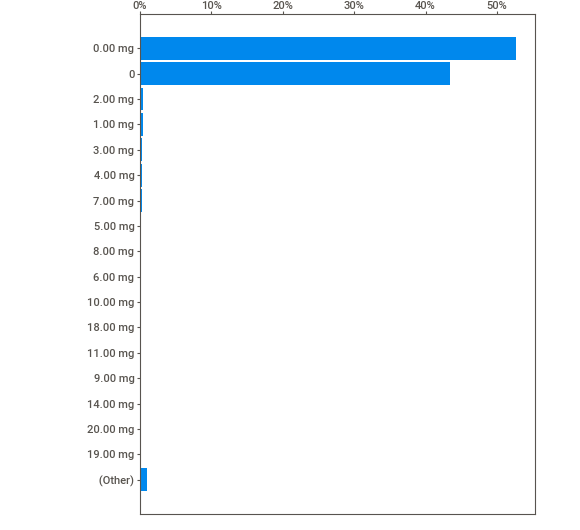
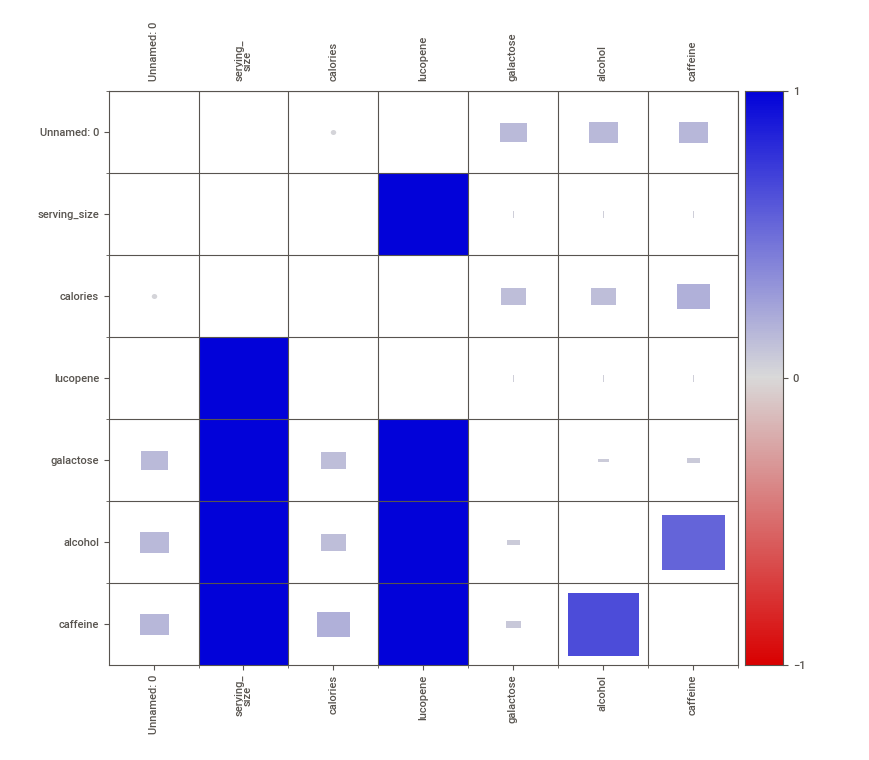
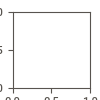

In [ ]:
report.show_notebook()

In [ ]:
print(dataset['serving_size'].unique())
print(dataset['calories'].unique())
print(dataset['total_fat'].unique())
print(dataset['saturated_fat'].unique())
print(dataset['cholesterol'].unique())
print(dataset['sodium'].unique())
print(dataset['choline'].unique())
print(dataset['fat'].unique())
print(dataset['saturated_fatty_acids'].unique())
print(dataset['monounsaturated_fatty_acids'].unique())
print(dataset['polyunsaturated_fatty_acids'].unique())
print(dataset['water'].unique())

['100 g']
[381 691  25 367 144  42 282 300 290 349  51 407 215 134 316  29 148 172
  57 182 272 516 201 270 119 268 673 371  20 406  30 271  68 103 576 283
 106 322 384 383 108  47  43  33 876  17 424  28 147  16  15 410 428 116
 203 461 301 313 374 500 331 763 233 102 216 522  36 249 133 261 198 264
 352 100 293  37 517 425 427 570  72  62  48 146 245 170  78 318 177  44
 254  32  12 281 251 296  38 719  61  64  98 391  45 157  22  31 358  46
  41  34  94  66  40 185  23  90 416  74 445 223 239 276 386 327 173 153
 333 130 311 195 482 475 341 717 345  27 350 351 120 321  63 165 519  39
 273 530 143 375 306 260 326 325 476 360  69 315  50 197 385 125 884 319
  55 151 161  49 474 115  19 335  76 392 284 394 112  35 107 412  58 413
 250 111  71 257  85 124 253  95 258 902 509  96 207 365  89 237 465 498
 304 278 337 387 101 414 370 241 458  26 307 238  53 286 166  18 372  52
 353 525 397 339 503 269  83 430 348 305 255 363  70  88 141 183 248 368
 361 364   3 117 369 299 342  93 246  24 

In [ ]:
dataset = dataset.astype({'serving_size' : 'string'})
dataset = dataset.astype({'calories' : 'string'})
dataset = dataset.astype({'total_fat' : 'string'})
dataset = dataset.astype({'saturated_fat' : 'string'})
dataset = dataset.astype({'cholesterol' : 'string'})
dataset = dataset.astype({'sodium' : 'string'})
dataset = dataset.astype({'choline' : 'string'})
dataset = dataset.astype({'fat' : 'string'})
dataset = dataset.astype({'saturated_fatty_acids' : 'string'})
dataset = dataset.astype({'monounsaturated_fatty_acids' : 'string'})
dataset = dataset.astype({'polyunsaturated_fatty_acids' : 'string'})
dataset = dataset.astype({'water' : 'string'})